# **1. Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/DM1/Project/'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(path + 'absenteeism_data.csv', delimiter=';')

# **2. Data Exploration**



## 2.1. Getting to know the dataset

In [ ]:
data.shape

(800, 22)

In [ ]:
data.count()

,0
ID,800
Reason for absence,740
Month of absence,737
Day of the week,740
Seasons,573
Days since previous absence,781
Transportation expense,800
Distance from Residence to Work,800
Estimated commute time,800
Service time,800


In [ ]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,...,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,13,...,No,1,2,Y,No,1,90,172,30,4
1,36,Unspecified,July,Tuesday,NaN,0.0,118,13,26,18,...,Yes,1,1,Y,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,18,...,No,1,0,Yes,No,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,NaN,0.0,279,5,5,14,...,No,1,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,0.0,289,36,69,13,...,No,1,2,Yes,No,1,90,172,30,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               800 non-null    int64  
 1   Reason for absence               740 non-null    object 
 2   Month of absence                 737 non-null    object 
 3   Day of the week                  740 non-null    object 
 4   Seasons                          573 non-null    object 
 5   Days since previous absence      781 non-null    float64
 6   Transportation expense           800 non-null    int64  
 7   Distance from Residence to Work  800 non-null    int64  
 8   Estimated commute time           800 non-null    int64  
 9   Service time                     800 non-null    object 
 10  Years until retirement           800 non-null    int64  
 11  Date of Birth                    800 non-null    object 
 12  Disciplinary failure  

The variable **"Seasons"** has a lot of missing values. We can get around this problem in rows in which there is no **"Seasons"** data but there is a **"Month of Absense"** variable.



In [ ]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Days since previous absence', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Date of Birth',
       'Disciplinary failure', 'Education', 'Number of children',
       'Social drinker', 'Social smoker', 'Number of pets', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

### 2.1.1. Distribution of values in features

In [ ]:
data2 = data.copy()

####Absenteeism in Hours

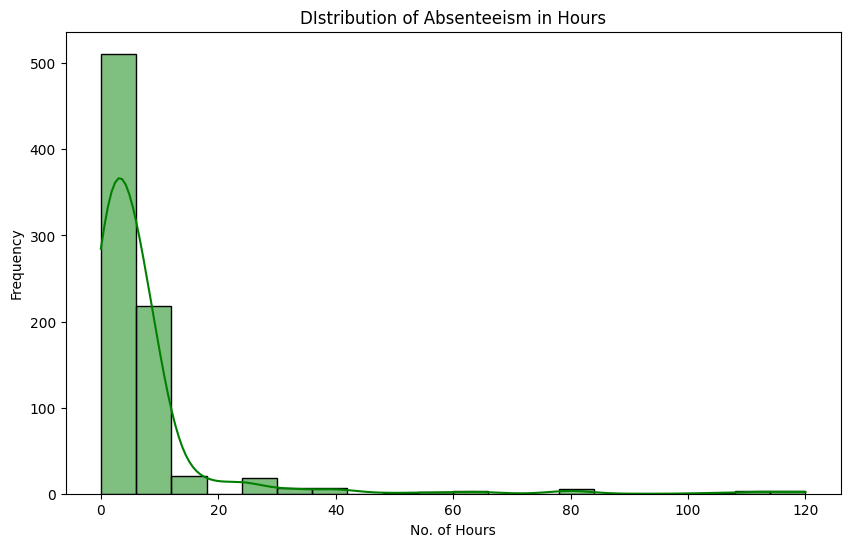

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data2['Absenteeism time in hours'], kde=True, bins=20, color='green')
plt.title('DIstribution of Absenteeism in Hours')
plt.xlabel('No. of Hours')
plt.ylabel('Frequency')
plt.show()

#### Reason for Absence

In [ ]:
data2['Reason for absence'].value_counts()

,count
Reason for absence,
Medical consultation,149
Dental consultation,112
Physiotherapy,69
Diseases of the musculoskeletal system and connective tissue,55
Unspecified,43
"Injury, poisoning and other consequences of external causes",40
Patient follow-up,38
Unjustified absence,33
Laboratory examination,31


For purposes of a easier analysis, we will split the data into **5 categories** of Reasons for absence:

1.   **Medical Appointment**;
2.   **Disease**;
3.   **Pregnancy**;
4.   **Unjustified**;
5.   **Unspecified**.

In [ ]:
def agrupar_razao(razao):
    r = str(razao).lower()

    if 'consultation' in r or 'physiotherapy' in r or 'donation' in r or 'examination' in r or 'follow-up' in r or 'abnormalities' in r:
        return 'Medical Appointment'

    elif 'diseases' in r or 'neoplasms' in r or 'injury' in r or 'disorders' in r or 'symptoms' in r or 'health' in r:
        return 'Disease'

    elif 'pregnancy' in r or 'perinatal' in r:
        return 'Pregnancy'

    elif 'unjustified' in r:
        return 'Unjustified'

    elif 'unspecified' in r:
        return 'Unspecified'

    else:
        return 'N/A'

data2['ReasonCat'] = data2['Reason for absence'].apply(agrupar_razao)

data2['ReasonCat'].value_counts()

,count
ReasonCat,
Medical Appointment,403
Disease,256
N/A,60
Unspecified,43
Unjustified,33
Pregnancy,5


In [ ]:
total_absent_hours_reason = data2.groupby('ReasonCat')['Absenteeism time in hours'].sum()

print(total_absent_hours_reason)

avg_absent_hours_reason = data2.groupby('ReasonCat')['Absenteeism time in hours'].mean()

print(avg_absent_hours_reason)

ReasonCat
Disease                3513
Medical Appointment    1349
N/A                     546
Pregnancy                22
Unjustified             240
Unspecified               0
Name: Absenteeism time in hours, dtype: int64
ReasonCat
Disease                13.722656
Medical Appointment     3.347395
N/A                     9.100000
Pregnancy               4.400000
Unjustified             7.272727
Unspecified             0.000000
Name: Absenteeism time in hours, dtype: float64


#### Month of Absence

/tmp/ipython-input-1199549458.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Month of absence', ylabel='Absenteeism time in hours'>

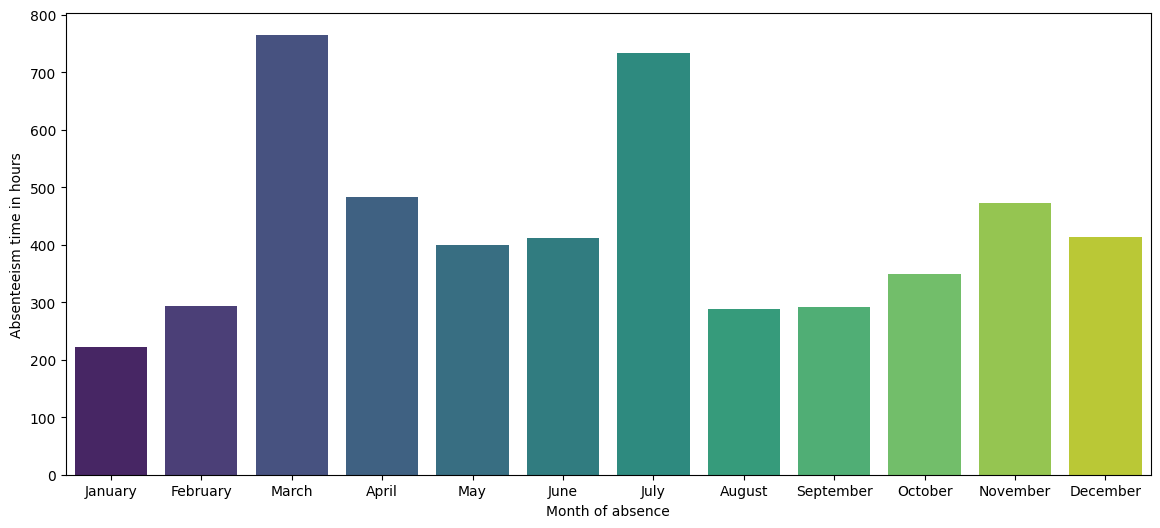

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data2['Month of absence'] = pd.Categorical(data2['Month of absence'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 6))

sns.barplot(
    data=data2,
    x='Month of absence',
    y='Absenteeism time in hours',
    estimator=sum,
    errorbar=None,
    order=month_order,
    palette='viridis')

The month in which there are more absenteeism is in **March**, and the less is in **January**.

#### Seasons

Since we have some missing values in the "Season", we will fill that with the "Month of Absence" variable. **We have to pay attention that the company in question is located in Brasil (South Hemisfere).**

In [ ]:
season_mapping = {
    'December': 'Summer', 'January': 'Summer', 'February': 'Summer',
    'March': 'Autumn', 'April': 'Autumn', 'May': 'Autumn',
    'June': 'Winter', 'July': 'Winter', 'August': 'Winter',
    'September': 'Spring', 'October': 'Spring', 'November': 'Spring'
}

data2['Seasons'] = data2['Seasons'].fillna(data2['Month of absence'].map(season_mapping))

/tmp/ipython-input-3387827095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seasons', y='Absenteeism time in hours', data=data2, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='Spectral')


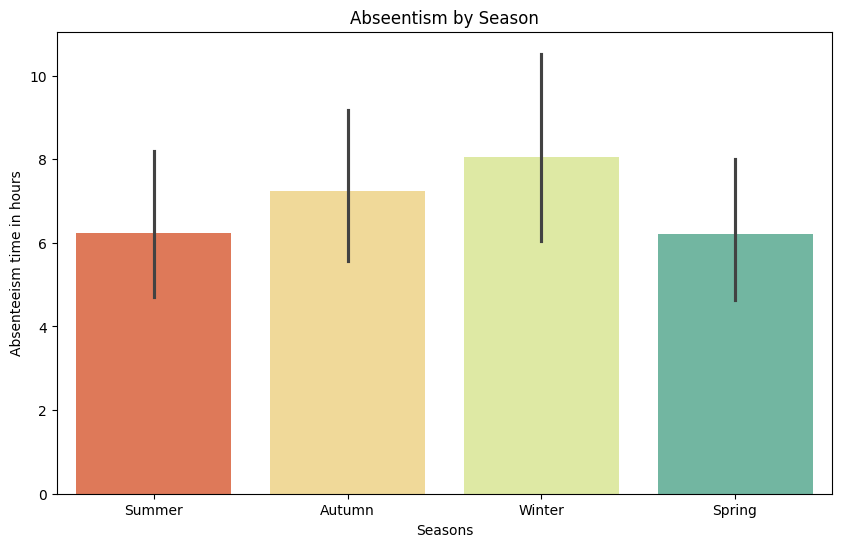

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Absenteeism time in hours', data=data2, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='Spectral')
plt.title('Abseentism by Season')
plt.show()

The season in which there are more absenteeism is in **Winter**.

#### Day of the Week

/tmp/ipython-input-1671461995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of the week', y='Absenteeism time in hours', data=data2, palette="Set2")


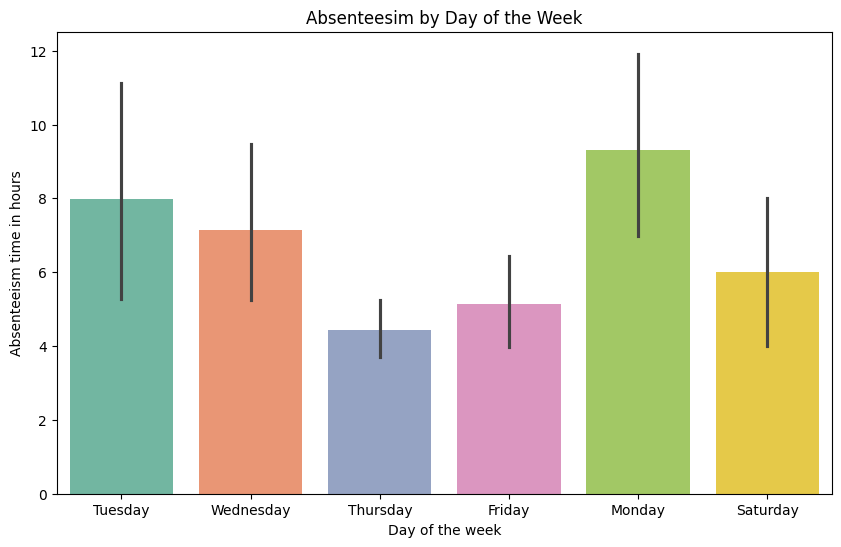

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of the week', y='Absenteeism time in hours', data=data2, palette="Set2")
plt.title('Absenteesim by Day of the Week')
plt.show()

The day of the week which has more absenteeism are "**Mondays**", and the one which as least are "**Thursdays**".

#### Service Time

In [ ]:
data2['Service time'].value_counts()

,count
Service time,
18,150
9,130
14,89
13,75
12,60
11,57
10,56
16,43
-,28


/tmp/ipython-input-1367333075.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=sum, order=years_ordered, palette='magma')
/tmp/ipython-input-1367333075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=average, order=years_ordered, palette='viridis')


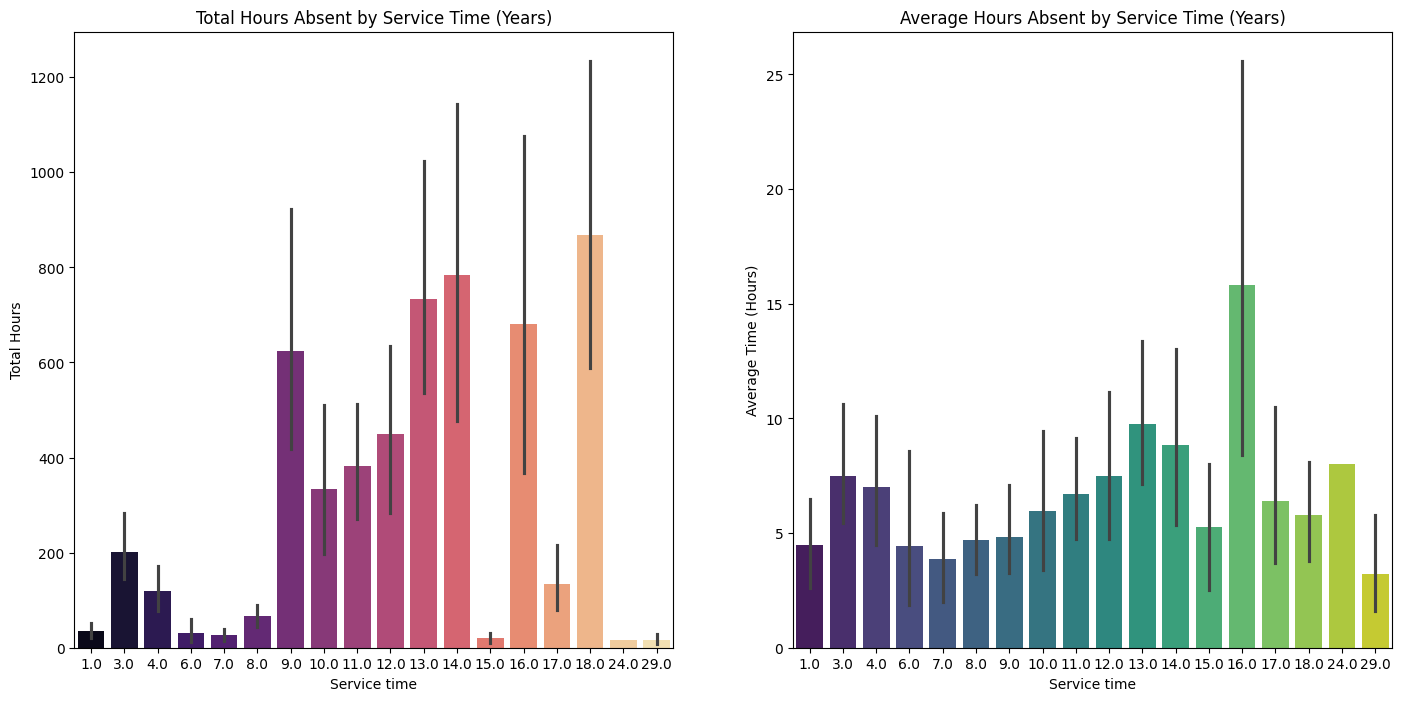

In [ ]:
from numpy import average
data2['Service time'] = pd.to_numeric(data2['Service time'], errors='coerce')

years_ordered = sorted(data2['Service time'].dropna().unique())

plt.figure(figsize=(17,8))

plt.subplot(1, 2, 1)

sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=sum, order=years_ordered, palette='magma')
plt.title('Total Hours Absent by Service Time (Years)')
plt.ylabel('Total Hours')

plt.subplot(1, 2, 2)
sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=average, order=years_ordered, palette='viridis')
plt.title('Average Hours Absent by Service Time (Years)')
plt.ylabel('Average Time (Hours)')

plt.show()

(Interpretar)

####Years Until Retirement

([<matplotlib.axis.XTick at 0x78c2d6c14ad0>,
 [Text(-1, 0, '−1'),
  Text(7, 0, '7'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38')])

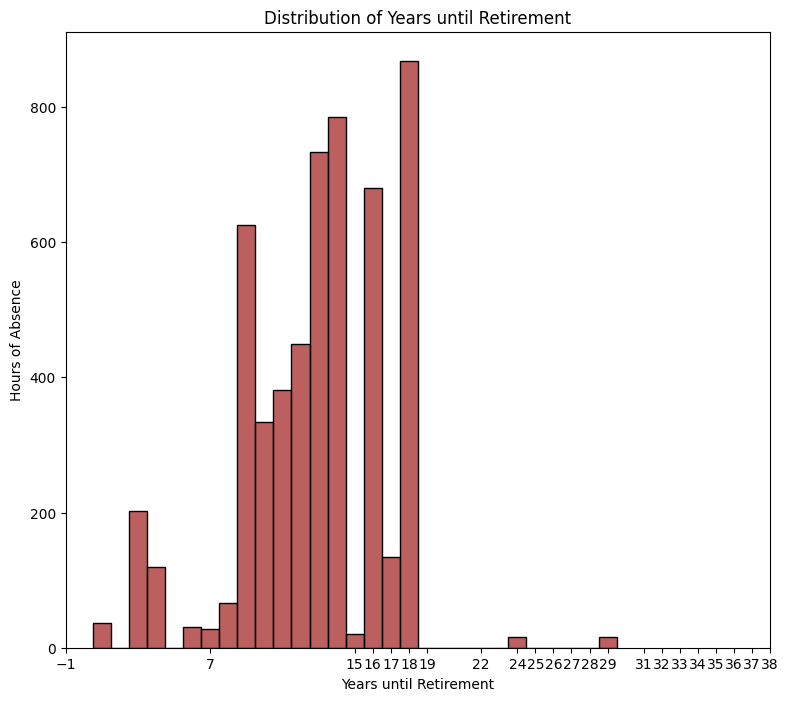

In [ ]:
years_retirement_ordered = sorted(data2['Years until retirement'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data = data2, x='Service time', weights='Absenteeism time in hours', discrete=True, color='brown')
plt.title('Distribution of Years until Retirement')
plt.xlabel('Years until Retirement')
plt.ylabel('Hours of Absence')
plt.xticks(years_retirement_ordered)

We can see that there are rows in wich the years until retirement is **"-1" (which is not possible)**. We have to deal with this in the Pre Processing Phase.

####Age

We will create a variable called **"Age"** that is easier to interpret and visualize than **"Date of Birth"**.

In [ ]:
data2['Date of Birth'] = pd.to_datetime(data2['Date of Birth'])

data2['Age'] = 2025 - data2['Date of Birth'].dt.year

In [ ]:
data2['Age'].value_counts()

,count
Age,
28,131
38,122
37,82
40,63
36,58
33,54
30,49
50,39
41,33


In [ ]:
data2['Age'].max()


58

In [ ]:
data2['Age'].min()

27

For purposes of a easier analysis, we will split the data into **4 categories** of Age:

1.   **Young adults** (< 30 years);
2.   **Established Adults** (30 - 39 years);
3.   **Middle Aged** (40 - 49 years);
4.   **Seniors** (The ones closer to retirement) (50+ years).

In [ ]:
def age_categories(idade):
    if idade < 30:
        return 'Young adults'
    elif 30 <= idade <= 39:
        return 'Established Adults'
    elif 40 <= idade <= 49:
        return 'Middle Aged'
    else:
        return 'Seniors'

data2['AgeCat'] = data2['Age'].apply(age_categories)

data2['AgeCat'].value_counts()

,count
AgeCat,
Established Adults,444
Middle Aged,161
Young adults,145
Seniors,50


In [ ]:
data2['AgeCat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: AgeCat
Non-Null Count  Dtype 
--------------  ----- 
800 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB


In [ ]:
total_absent_hours_age = data2.groupby('AgeCat')['Absenteeism time in hours'].sum()

print(total_absent_hours_age)

avg_absent_hours_age = data2.groupby('AgeCat')['Absenteeism time in hours'].mean()

print(avg_absent_hours_age)

AgeCat
Established Adults    3082
Middle Aged           1037
Seniors                786
Young adults           765
Name: Absenteeism time in hours, dtype: int64
AgeCat
Established Adults     6.941441
Middle Aged            6.440994
Seniors               15.720000
Young adults           5.275862
Name: Absenteeism time in hours, dtype: float64


#### Education

In [ ]:
education_dict = {
    1: 'High School',
    2: 'Graduate',
    3: 'Postgraduate',
    4: "Master's or PhD"
}

data2['Education'] = data2['Education'].map(education_dict)

data2['Education'].value_counts()

,count
Education,
High School,662
Postgraduate,84
Graduate,50
Master's or PhD,4


In [ ]:
total_absent_hours_educ = data2.groupby('Education')['Absenteeism time in hours'].sum()

print(total_absent_hours_educ)

avg_absent_hours_educ = data2.groupby('Education')['Absenteeism time in hours'].mean()

print(avg_absent_hours_educ)

Education
Graduate            306
High School        4912
Master's or PhD      21
Postgraduate        431
Name: Absenteeism time in hours, dtype: int64
Education
Graduate           6.120000
High School        7.419940
Master's or PhD    5.250000
Postgraduate       5.130952
Name: Absenteeism time in hours, dtype: float64


#### Number of Children

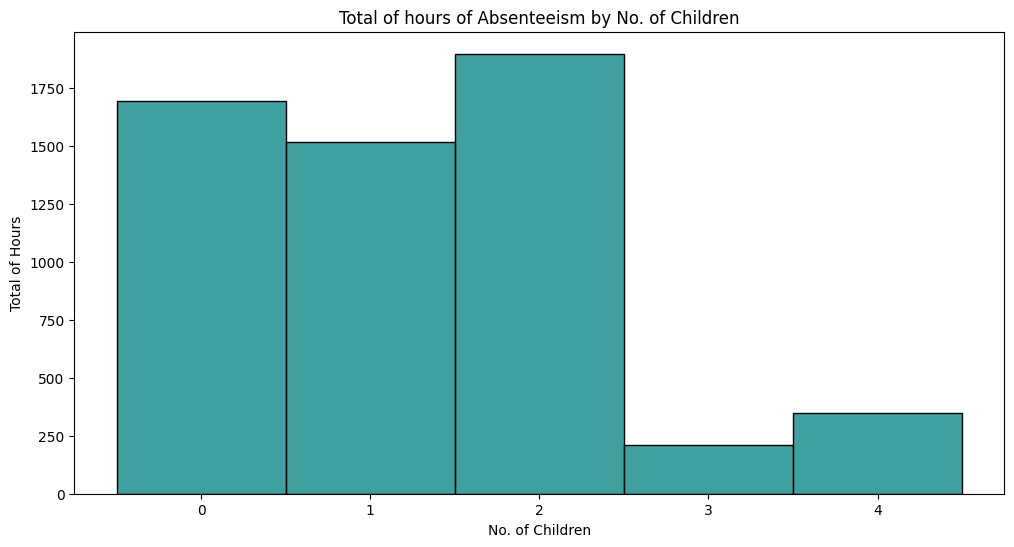

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Number of children', weights='Absenteeism time in hours', discrete=True, color='teal')

plt.title('Total of hours of Absenteeism by No. of Children')
plt.xlabel('No. of Children')
plt.ylabel('Total of Hours')
plt.xticks(range(5))
plt.show()

The workers that have **2 children** are the ones that have more total hours of absence in work.

#### Number of Pets

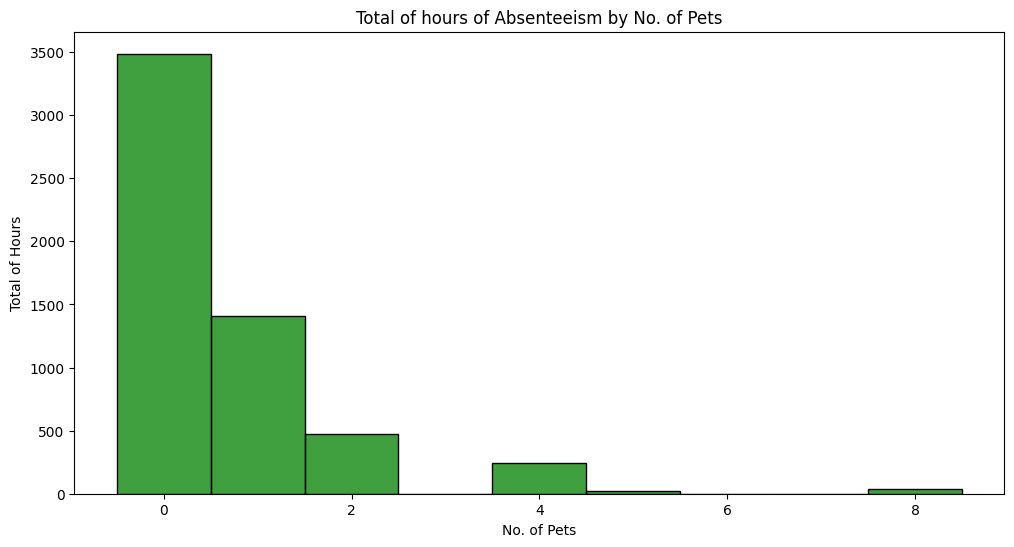

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Number of pets', weights='Absenteeism time in hours', discrete=True, color='green')

plt.title('Total of hours of Absenteeism by No. of Pets')
plt.xlabel('No. of Pets')
plt.ylabel('Total of Hours')
plt.show()

The category in which the workers have more time of absence, are the ones that have **no pets**.

#### Social Drinker

In [ ]:
data2['Social drinker'].unique()

array(['Y', 'Yes', 'No'], dtype=object)

In a first analysis, we verified that part of the data **has neither "Yes" or "No" in the field, but instead had "Y"**. We assumed that **"Y" corresponds to "Yes"**, thus we had to transform it.

In [ ]:
data2['Social drinker'] = data2['Social drinker'].replace({'Y': 'Yes', 'y': 'Yes'})

data2['Social drinker'].unique()

array(['Yes', 'No'], dtype=object)

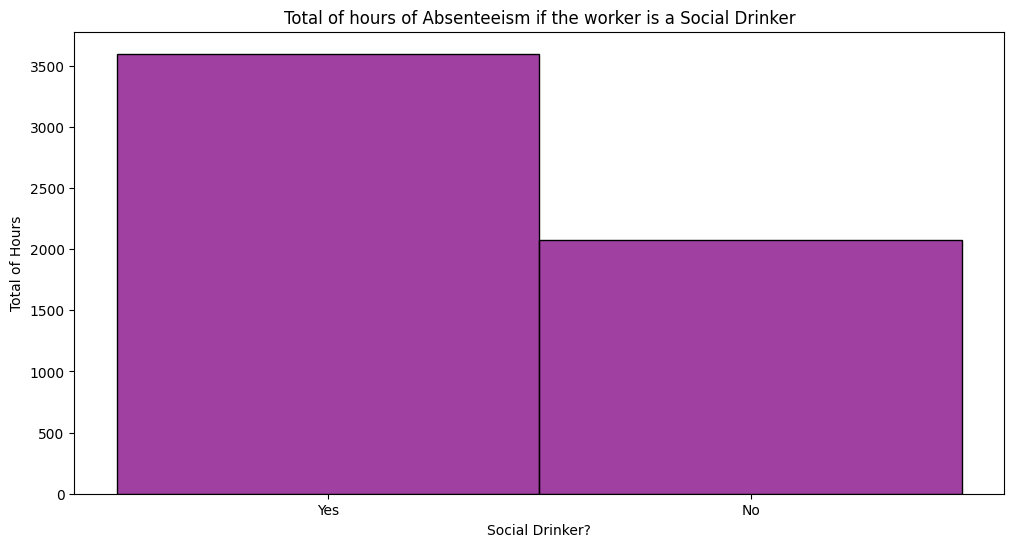

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Social drinker', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker is a Social Drinker')
plt.xlabel('Social Drinker?')
plt.ylabel('Total of Hours')
plt.show()

We observe that the **Social drinker have the more total hours absent than those who are not**.

#### Social smoker

In [ ]:
data2['Social smoker'].unique()

array(['No', 'Yes', 'Y'], dtype=object)

In a first analysis, we verified that part of the data **has neither "Yes" or "No" in the field, but instead had "Y"**. We assumed that **"Y" corresponds to "Yes"**, thus we had to transform it.

In [ ]:
data2['Social smoker'] = data2['Social smoker'].replace({'Y': 'Yes', 'y': 'Yes'})

data2['Social smoker'].unique()

array(['No', 'Yes'], dtype=object)

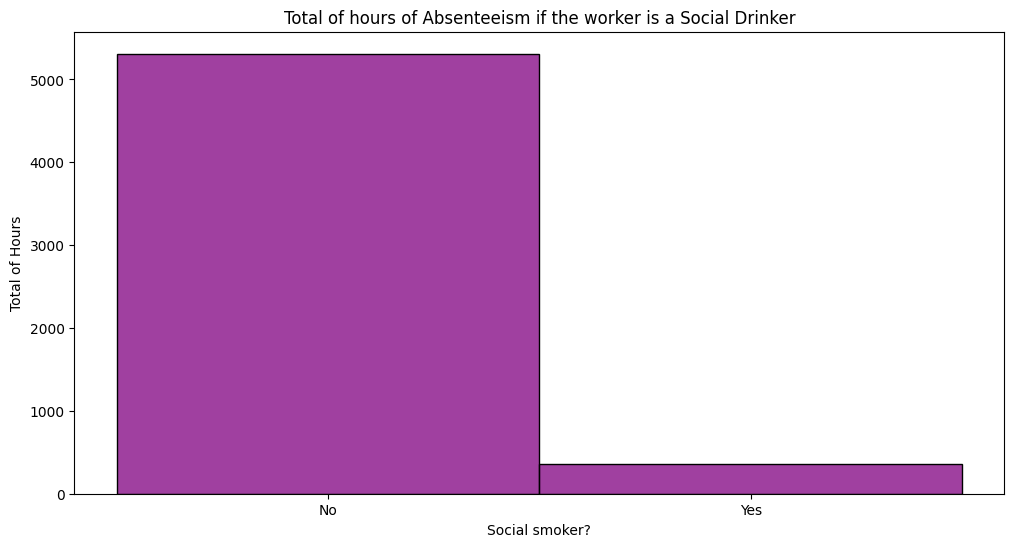

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Social smoker', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker is a Social Drinker')
plt.xlabel('Social smoker?')
plt.ylabel('Total of Hours')
plt.show()

We observe that the non **Social smokers have the more total hours absent than those who are**.

#### Disciplinary failure

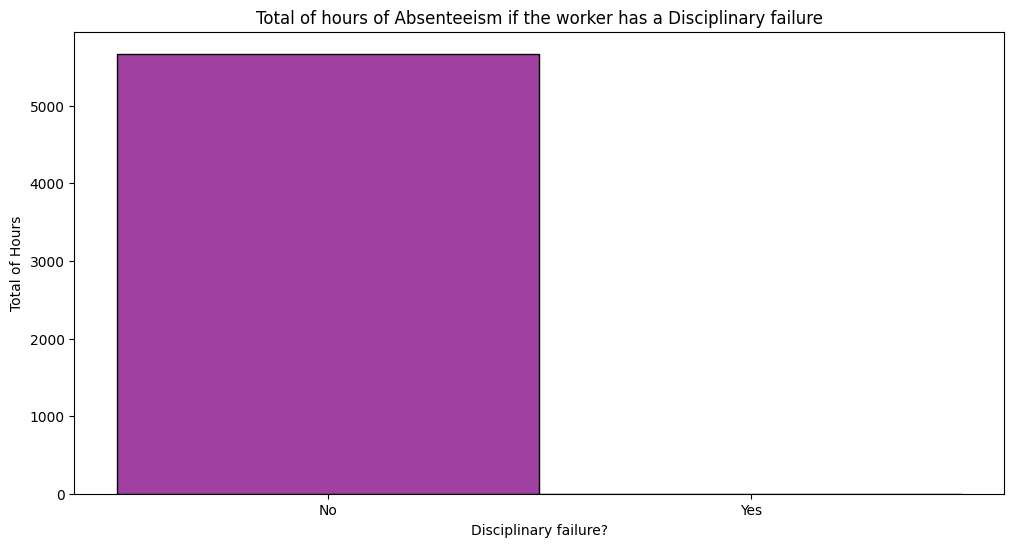

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Disciplinary failure', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker has a Disciplinary failure')
plt.xlabel('Disciplinary failure?')
plt.ylabel('Total of Hours')
plt.show()

In [ ]:
data2['Disciplinary failure'].value_counts()

,count
Disciplinary failure,
No,756
Yes,44


We observe that the **wide majority of absence cases don't violate workplace policies**.

#### Transportation Expense

<Axes: xlabel='Transportation expense'>

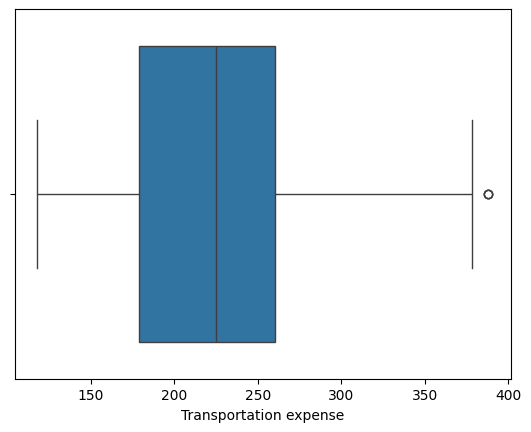

In [ ]:
sns.boxplot(data=data2, x='Transportation expense')

#### Estimated Commute Time

([<matplotlib.axis.XTick at 0x78c2d6ae4ef0>,
 [Text(5, 0, '5'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(26, 0, '26'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(31, 0, '31'),
  Text(34, 0, '34'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(45, 0, '45'),
  Text(48, 0, '48'),
  Text(50, 0, '50'),
  Text(52, 0, '52'),
  Text(54, 0, '54'),
  Text(56, 0, '56'),
  Text(59, 0, '59'),
  Text(63, 0, '63'),
  Text(69, 0, '69'),
  Text(81, 0, '81'),
  Text(85, 0, '85'),
  Text(94, 0, '94'),
  Text(97, 0, '97'),
  Text(98, 0, '98'),
  Text(100, 0, '100'),
  Text(108, 0, '108'),
  Text(114, 0, '114')])

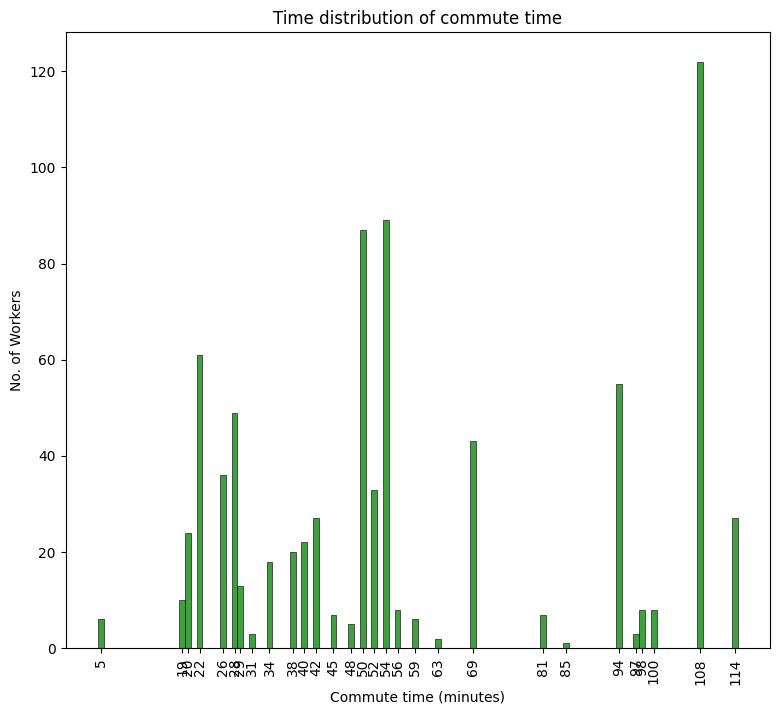

In [ ]:
time_ordered = sorted(data2['Estimated commute time'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Estimated commute time'], discrete=True, color='green')
plt.title('Time distribution of commute time')
plt.xlabel('Commute time (minutes)')
plt.ylabel('No. of Workers')
plt.xticks(time_ordered, rotation=90)

#### Distance from Residence to Work

Text(0, 0.5, 'No. of Workers')

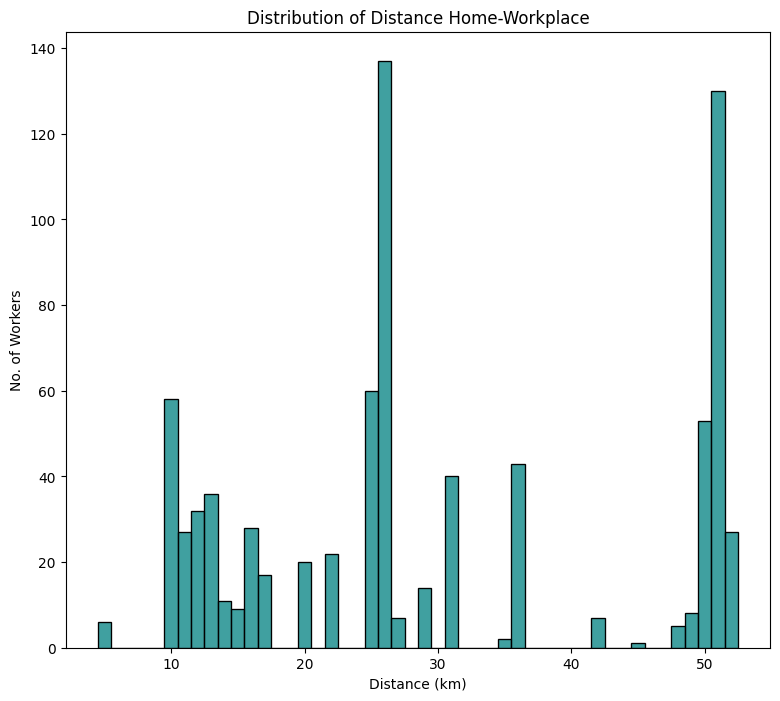

In [ ]:
distance_ordered = sorted(data2['Distance from Residence to Work'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Distance from Residence to Work'], discrete=True, color='teal')
plt.title('Distribution of Distance Home-Workplace')
plt.xlabel('Distance (km)')
plt.ylabel('No. of Workers')

#### Days since previous absence

<Axes: xlabel='Days since previous absence'>

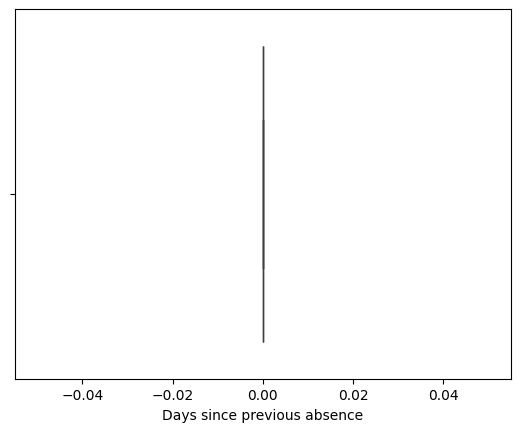

In [ ]:
sns.boxplot(data=data2, x='Days since previous absence')

In [ ]:
data2['Days since previous absence'].value_counts()

,count
Days since previous absence,
0.0,781


Tis variable has **no information whatsoever**.

#### Weight

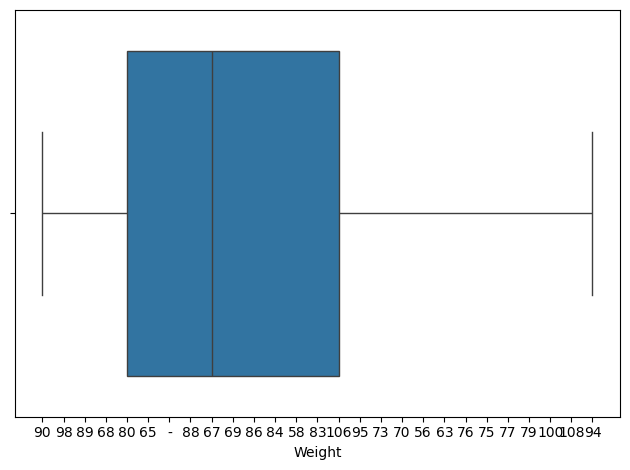

In [ ]:
sns.boxplot(data=data2, x='Weight')
plt.tight_layout()

#### Height

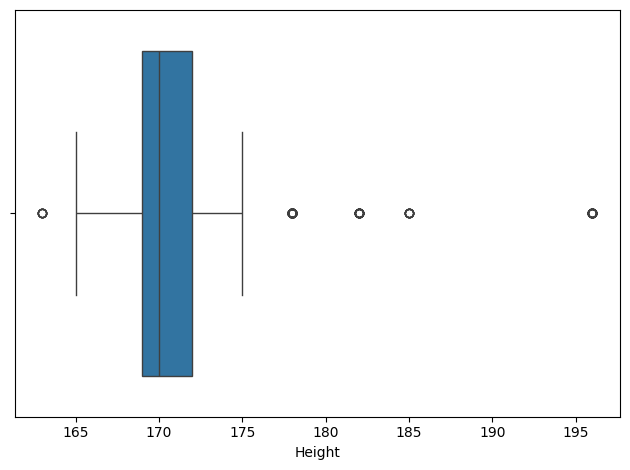

In [ ]:
sns.boxplot(data=data2, x='Height')
plt.tight_layout()


#### Body Mass Index

([<matplotlib.axis.XTick at 0x78c2d6624a40>,
 [Text(19, 0, '19'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(38, 0, '38')])

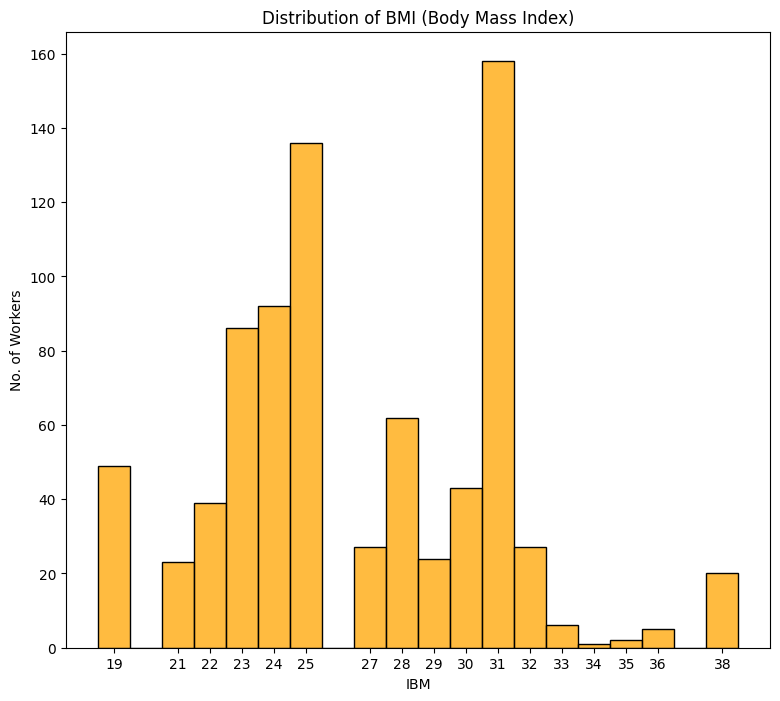

In [ ]:
bmi_ordered = sorted(data2['Body mass index'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Body mass index'], discrete=True, color='orange')
plt.title('Distribution of BMI (Body Mass Index)')
plt.xlabel('IBM')
plt.ylabel('No. of Workers')
plt.xticks(bmi_ordered)

#### Correlation Matrix

In [ ]:
numeric_data = data2.drop('ID', axis=1)
numeric_data = data2.drop('Days since previous absence', axis=1)

for col in list(numeric_data.columns):
    dtype = str(numeric_data[col].dtype)

    if dtype != 'float64' and dtype != 'int64' and dtype != 'int32':
        numeric_data = numeric_data.drop(col, axis=1)

numeric_data.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Estimated commute time', 'Service time', 'Years until retirement',
       'Number of children', 'Number of pets', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Age'],
      dtype='object')

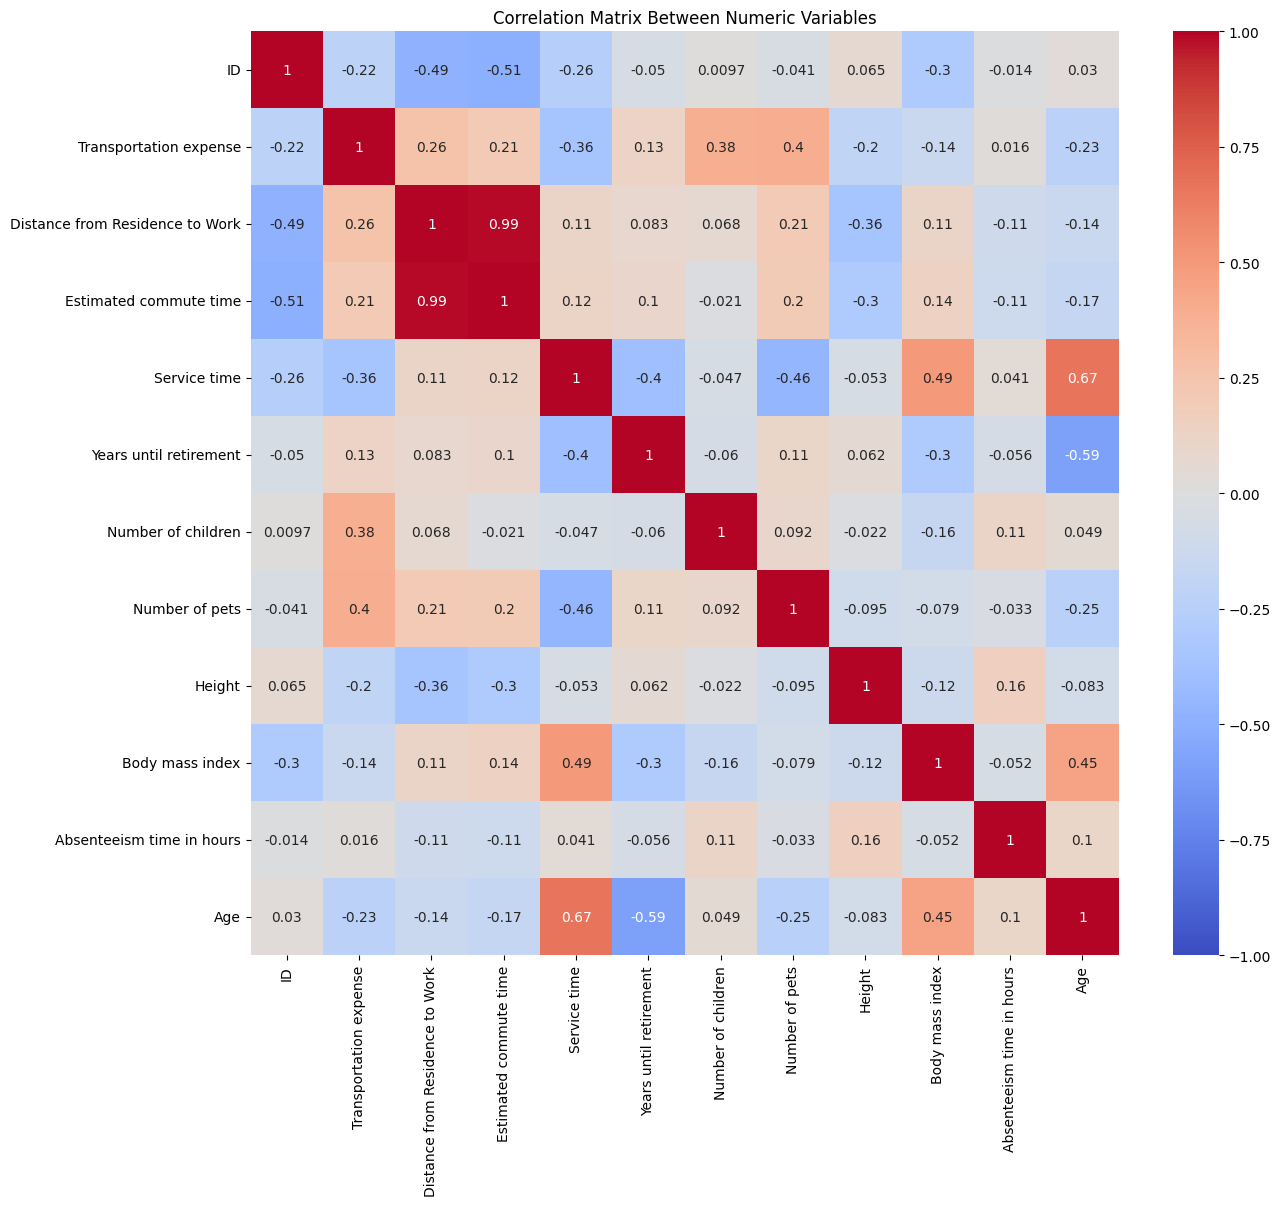

In [ ]:
corr_matrix = numeric_data.corr()

plt.figure(figsize=(14, 12))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix Between Numeric Variables')
plt.show()

# Clustering Analysis

In [ ]:
# Import packages
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

The purpose of this section is to perform different clustering techniques to find interesting patterns among the abseentism data provided.

The methodologies will include the following algorithsm:
1. K-Means: We will iterate K-means clustering and evaluate results with different number of clusters.
2. Hierarchical: This algorithm provides us with a hierarchy of clusters and represents them in a dendogram.
3. DBSCAN: To cluster densely packed regions and identify outliers, which can also show us employees with a highly particular absentee behavior.

But first, we will do the obligatory feature selection, based on our previous assesment of the data structure.


## Step 3.1 Feature Selection

We will select the following features based on an assesment of what type of data are each of the columns in the original dataset.

In [ ]:
#first, take a glimpse at the dataset after preprocessing it
data2.dtypes

,0
ID,int64
Reason for absence,object
Month of absence,category
Day of the week,object
Seasons,object
Days since previous absence,float64
Transportation expense,int64
Distance from Residence to Work,int64
Estimated commute time,int64
Service time,float64


In [ ]:
# Separate between numeric and non nuneric columns

exclude_cols = ['ID'] #columns to drop from features, if they're of no use

numeric_cols = data2.select_dtypes(include=[np.number]).columns
feature_names = [col for col in numeric_cols if col not in exclude_cols]
X = data2[feature_names].copy() #Dataset to perform clustering analysis with

print(f"✓ Selected {len(feature_names)} features for clustering")
print(f"  Features: {', '.join(feature_names[:15])}{'...' if len(feature_names) > 15 else ''}")

✓ Selected 12 features for clustering
  Features: Days since previous absence, Transportation expense, Distance from Residence to Work, Estimated commute time, Service time, Years until retirement, Number of children, Number of pets, Height, Body mass index, Absenteeism time in hours, Age


## Step 3.2 Scaling

Since we're dealing with different scales of data (e.g. number of childrem and body mass index) and we will be performing distance based algorithms, we need to perform a scaling function to normalize our data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)

X_prod = pd.DataFrame(X_normalized, columns = X.columns)
X_prod.head(10)


,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Number of children,Number of pets,Height,Body mass index,Absenteeism time in hours,Age
0,0.0,0.633333,0.659574,0.587156,0.428571,0.846154,0.50,0.125,0.272727,0.578947,0.033333,0.193548
1,0.0,0.000000,0.170213,0.192661,0.607143,0.410256,0.25,0.000,0.454545,0.631579,0.000000,0.741935
2,0.0,0.225926,0.978723,0.944954,0.607143,0.717949,0.00,0.000,0.212121,0.631579,0.016667,0.354839
3,0.0,0.596296,0.000000,0.000000,0.464286,0.692308,0.50,0.000,0.151515,0.263158,0.033333,0.387097
4,0.0,0.633333,0.659574,0.587156,0.428571,0.846154,0.50,0.125,0.272727,0.578947,0.016667,0.193548
5,0.0,0.225926,0.978723,0.944954,0.607143,0.717949,0.00,0.000,0.212121,0.631579,0.016667,0.354839
6,NaN,0.900000,1.000000,1.000000,0.071429,0.974359,0.25,0.500,0.272727,0.421053,0.066667,0.032258
7,0.0,0.525926,0.957447,0.816514,0.357143,0.769231,1.00,0.000,0.151515,0.210526,0.033333,0.290323
8,0.0,0.137037,0.148936,0.211009,0.464286,0.820513,0.50,0.000,1.000000,0.315789,0.333333,0.225806
9,0.0,0.433333,0.127660,0.137615,0.464286,0.743590,0.25,0.125,0.272727,0.526316,0.066667,0.322581


## Step 3.3 Selecting number of clusters

### 3.3.1 Elbow Method

We will select the number of cluster with the visual method, commonly referred as teh 'Elbow Method'.
To use the elbow method we must calculate the sum of squared errors (SSE) between each data point and the centroid of the cluster to which it was assigned. We do this for all values of k we want to analyze.
Then, we plot the values of k against the respective obtained SSE.

We are looking for the point in which the SSE sharply reduces, meaning the point where adding more clusters doesn't add significant difference.

In [ ]:
ks = range(1, 10)
inertias = []

# provisional fillnan
X_prod.fillna(0, inplace = True)

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_prod)
    inertias.append(model.inertia_)

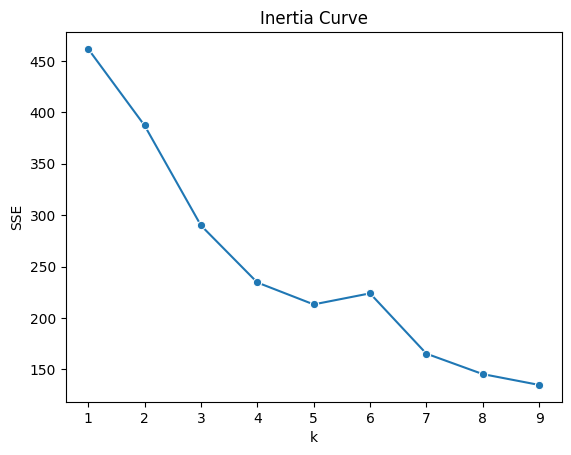

In [73]:
# Plot ks (x-axis) vs inertias (y-axis)
sns.lineplot(x=range(1, len(inertias) + 1), y=inertias, marker="o")
#plt.plot(ks, inertias)
plt.title('Inertia Curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

As we can see from the graph above, we can see a sharp decline in the SSE values until cluster number 8. So we will use this number of cluster.

### 3.3.2 Hierarchical Clustering

We will now apply a second analysis using hierarchical clustering, represented on a tree-shape structure called dendogram. We will compare these results with those above, to be sure about how many number of clusters we should be using.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Using Ward Linkage: Minimum variance to minimize the within cluster variance
hclustering = linkage(X_prod, 'ward')

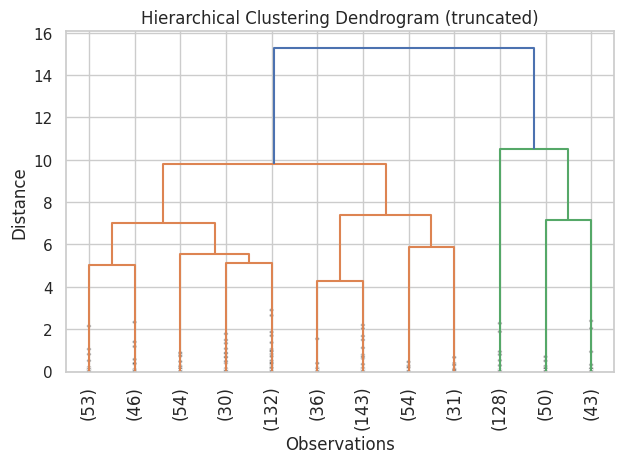

In [78]:
# plot dendogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.tight_layout()
plt.show()

We observe that the dendrogram seems to indicate that 4 is a good number of clusters.

We will now also run an R2 metric to compare different results.

In [82]:
from sklearn.metrics import pairwise_distances_argmin_min

def compute_r2_scores(X, ks=range(10, 0, -1), methods=['ward', 'complete', 'average', 'single']):
    r2_scores = {m: [] for m in methods}

    # Total sum of squares (fixed)
    centroid = np.mean(X, axis=0)
    ss_total = np.sum((X - centroid)**2)

    for method in methods:
        for k in ks:
            # Fit HC
            model = AgglomerativeClustering(n_clusters=k, linkage=method)
            labels = model.fit_predict(X)

            # Compute SS_within
            ss_within = 0
            for cluster_id in range(k):
                points = X[labels == cluster_id]
                if len(points) > 0:
                    cluster_centroid = np.mean(points, axis=0)
                    ss_within += np.sum((points - cluster_centroid)**2)

            r2 = (ss_total - ss_within) / ss_total
            r2_scores[method].append(r2)

    return r2_scores


In [83]:
def plot_r2_scores(r2_scores, ks=range(10, 0, -1)):
    sns.set(style="whitegrid", context="notebook")

    plt.figure(figsize=(12, 6))
    plt.title("R2 plot for various hierarchical methods", fontsize=18)

    markers = {
        'ward': 'o',
        'complete': 'o',
        'average': 'o',
        'single': 'o'
    }

    linestyles = {
        'ward': '-',
        'complete': '--',
        'average': ':',
        'single': '-.'
    }

    for method, scores in r2_scores.items():
        sns.lineplot(
            x=list(ks),
            y=scores,
            marker=markers[method],
            linestyle=linestyles[method],
            label=method
        )

    plt.xlabel("Number of clusters", fontsize=14)
    plt.ylabel("R2 metric", fontsize=14)
    plt.legend(title="HC methods")
    plt.tight_layout()
    plt.show()


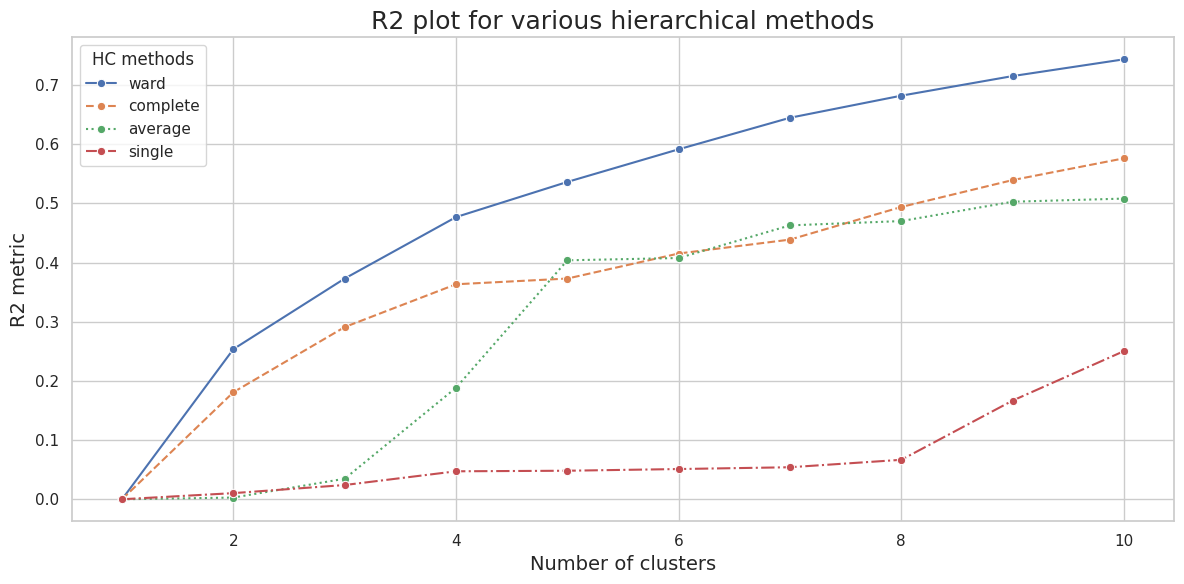

In [84]:
ks = range(10, 0, -1)
r2_scores = compute_r2_scores(X_prod.drop(columns=['label']).values, ks=ks)
plot_r2_scores(r2_scores, ks)

This graph reafirms us that Ward's linkage is the best method to decide the number of factors. According to the performance of this metric, it seems that around 6 to 8 clusters, the R2 metric stabilizes, so this number of clusters could help us retain thje information that we need when applying clustering algorithms.

### 3.3.3 Silhoutte Score

We will now apply a third criteria. We will measure the silhouette score for the different number of cluster

We can conclude from this graph, along with the elbow method, that 4 seems to be a good number of clusters!

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
def clusters_scores(X, cluster_algorithm, score_function):
    range_n_clusters = [4, 5, 6, 7, 8]
    scores =[]

    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = cluster_algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        score_avg = score_function(X, cluster_labels)
        scores.append(score_avg)

        print("For n_clusters =", n_clusters, "The average", score_function.__name__, "is :", score_avg)

    return scores

In [ ]:
from sklearn.cluster import KMeans
k_means_silhouette = clusters_scores(X_prod, KMeans, silhouette_score)

For n_clusters = 4 The average silhouette_score is : 0.24433745410526708
For n_clusters = 5 The average silhouette_score is : 0.3573093979695642
For n_clusters = 6 The average silhouette_score is : 0.38602414079865743
For n_clusters = 7 The average silhouette_score is : 0.3979808969678078
For n_clusters = 8 The average silhouette_score is : 0.4212045872752326


In [76]:
def draw_scores(scores):
    sns.set(style="whitegrid", context="notebook")

    plt.figure(figsize=(5, 5))
    sns.lineplot(
        x=range(4, 9),
        y=scores,
        marker="o",
        color="red",
        label="Silhouette Coefficient"
    )

    plt.title('K-Means Silhouette Score')
    plt.xlabel('Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(4, 9))
    plt.legend()
    plt.tight_layout()

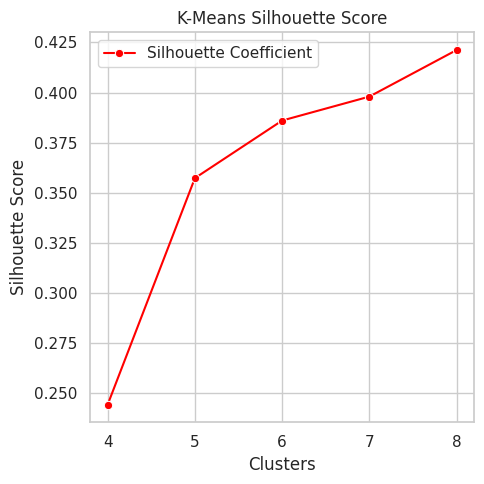

In [77]:
draw_scores(k_means_silhouette)

## Step 4 Applying K-means

In [ ]:
model = KMeans(n_clusters=5, random_state=0)

In [ ]:
model.fit(X_prod)

KMeans(n_clusters=5, random_state=0)

Label each column to the respective cluster:

In [ ]:
X_prod['label'] = model.labels_
X_prod

,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Number of children,Number of pets,Height,Body mass index,Absenteeism time in hours,Age,label
0,0.0,0.633333,0.659574,0.587156,0.428571,0.846154,0.50,0.125,0.272727,0.578947,0.033333,0.193548,3
1,0.0,0.000000,0.170213,0.192661,0.607143,0.410256,0.25,0.000,0.454545,0.631579,0.000000,0.741935,1
2,0.0,0.225926,0.978723,0.944954,0.607143,0.717949,0.00,0.000,0.212121,0.631579,0.016667,0.354839,4
3,0.0,0.596296,0.000000,0.000000,0.464286,0.692308,0.50,0.000,0.151515,0.263158,0.033333,0.387097,2
4,0.0,0.633333,0.659574,0.587156,0.428571,0.846154,0.50,0.125,0.272727,0.578947,0.016667,0.193548,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.633333,0.659574,0.587156,0.428571,0.846154,0.50,0.125,0.272727,0.578947,0.066667,0.193548,3
796,0.0,0.433333,0.127660,0.137615,0.464286,0.743590,0.25,0.125,0.272727,0.526316,0.033333,0.322581,2
797,0.0,0.000000,0.191489,0.266055,0.428571,0.666667,0.25,1.000,0.212121,0.789474,0.000000,0.419355,1
798,0.0,0.418519,0.638298,0.532110,0.464286,0.692308,0.50,0.250,0.212121,0.842105,0.000000,0.387097,2


### 4.1 Summary statistics for each cluster



In [ ]:
descr = X_prod.reset_index(drop=True).groupby('label').describe()
print(descr.T)

label                                       0           1           2  \
Days since previous absence count  131.000000  139.000000  268.000000   
                            mean     0.000000    0.000000    0.000000   
                            std      0.000000    0.000000    0.000000   
                            min      0.000000    0.000000    0.000000   
                            25%      0.000000    0.000000    0.000000   
...                                       ...         ...         ...   
Age                         min      0.000000    0.225806    0.032258   
                            25%      0.096774    0.322581    0.032258   
                            50%      0.161290    0.322581    0.258065   
                            75%      0.435484    0.741935    0.419355   
                            max      0.451613    1.000000    0.741935   

label                                       3           4  
Days since previous absence count  131.000000  131.000000  
   

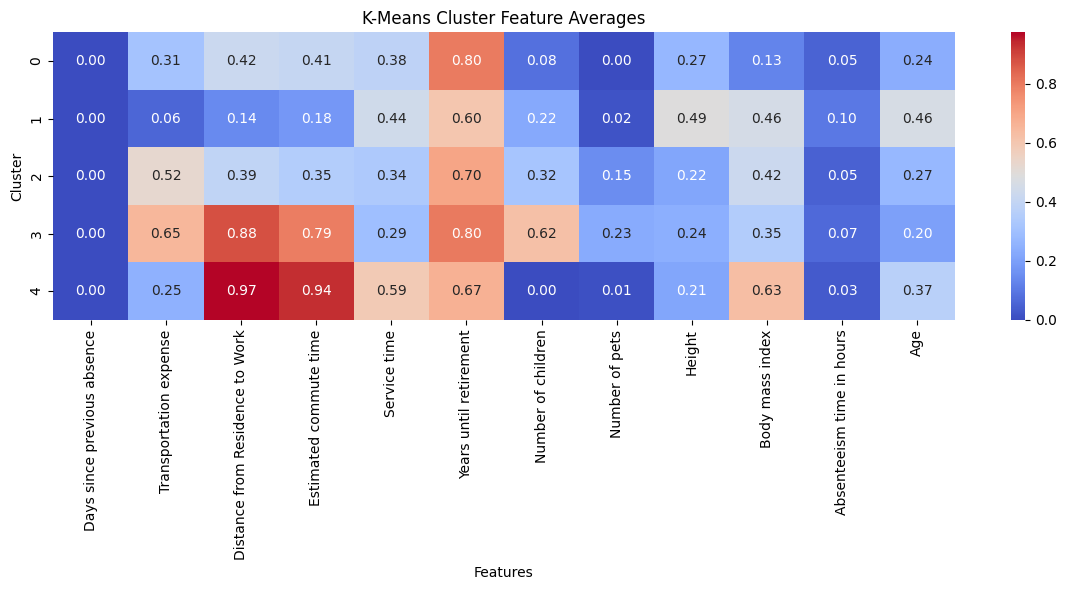

In [ ]:
#display cluster means
cluster_means = X_prod.groupby('label').mean(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("K-Means Cluster Feature Averages")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

As we can see, clusters 0 and 1 seem to be 'low risk of abseentism' clusters, represented by young and nearby workers. Cluster 2 seems to be a "experienced, stable" set of workers.
Finally, clusters 3 and 4 are "high risk of abseentism" workers, with a higher transportation commute, family members, and years until retirement.

### 4.2 Visualizing K-Means

In [86]:
#define dfs for each cluster
clusters = {}

for label in X_prod['label'].unique():
    clusters[label] = X_prod[X_prod['label'] == label]


We can now start exploring relationshis between variables and clusters of workers more easily. We will do this by plotting scatterplkots bewtween centroids for each variable.

In [95]:
centroids = model.cluster_centers_

centroids_df = pd.DataFrame(
    centroids,
    columns=X.columns,  # use your original DataFrame's column names
    index=[f'clusters{[i]}' for i in range(len(centroids))]
)

centroids_df

,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Number of children,Number of pets,Height,Body mass index,Absenteeism time in hours,Age
clusters[0],0.0,0.310037,0.421959,0.407171,0.381134,0.796046,0.080153,-1.110223e-16,0.268795,0.126155,0.052163,0.238611
clusters[1],0.0,0.060858,0.140977,0.177876,0.438335,0.602103,0.224820,1.618705e-02,0.488119,0.455509,0.101799,0.462520
clusters[2],0.0,0.523162,0.389092,0.351705,0.338753,0.703884,0.317164,1.515858e-01,0.215061,0.424784,0.048601,0.271305
clusters[3],0.0,0.654764,0.879812,0.793403,0.294438,0.802310,0.624046,2.309160e-01,0.241268,0.347931,0.067812,0.199212
clusters[4],0.0,0.250975,0.974825,0.936130,0.588332,0.666862,0.001908,1.049618e-02,0.214897,0.629570,0.033270,0.367643


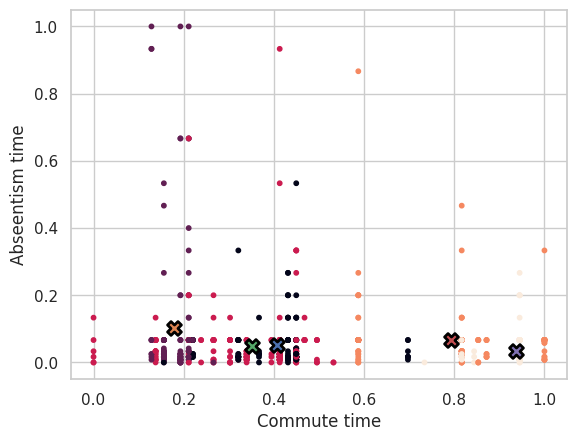

In [105]:
#create a subset with only the two features to compare
X_plot = X_prod[['Estimated commute time', 'Absenteeism time in hours']]

centroids_2d = centroids[:, [3, 10]]  # Extract only columns 3 and 10 from your full centroids

plt.scatter(X_prod['Estimated commute time'], X_prod['Absenteeism time in hours'],
            c=X_prod.label, s=10)
for i in range(len(centroids_2d)):
    plt.scatter(centroids_2d[i, 0], centroids_2d[i, 1], marker='X', s=100,
                edgecolors='black', linewidths=2)
plt.xlabel('Commute time')
plt.ylabel('Abseentism time')
plt.show()